# Python Coding and Data Set

Let's suppose you are a data scientist in a hospital and you want to detect breast cancer cells.

Usually the data is stored in a Data Base (DB), sometimes you collect the data yourself and you decide how to store the data. Today we will read data provided by @jeff-boykin. There are two files: one contains data and another has headers. To load the dataset folow the link https://gist.github.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d

Tasks:
- Load in the data file and header file provided
- The dataframe does not currently have a header, load in the header file and attach it to the dataframe
- Comment on any steps you might take to evaluate or transform the dataset.
- Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.
- Write a function to generate bootstrap samples of the data.

First, we're going to load some python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The files below you can find in the data folder as breast-cancer.csv and field_names.txt respectively (the source link is above). The format of data is CSV - Comma/Character Separated Value, and that means all the values represented as text and separated by a comma or another character. We can write a function to read the .csv files, but I suggest you to use a library function read_csv from pandas instead. Also this function allows to load the txt format.
    
As we know how our data looks like, let's load the headers first and then load the data with the headers as the names parameter.

In [2]:
headers = pd.read_csv('data/field_names.txt', header=None)
data = pd.read_csv('data/breast-cancer.csv', names=headers.values[:,0])
display(data.head(2))
data.info()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          569 non-null    int64  
 1   diagnosis                   569 non-null    object 
 2   radius_mean                 569 non-null    float64
 3   radius_sd_error             569 non-null    float64
 4   radius_worst                569 non-null    float64
 5   texture_mean                569 non-null    float64
 6   texture_sd_error            569 non-null    float64
 7   texture_worst               569 non-null    float64
 8   perimeter_mean              569 non-null    float64
 9   perimeter_sd_error          569 non-null    float64
 10  perimeter_worst             569 non-null    float64
 11  area_mean                   569 non-null    float64
 12  area_sd_error               569 non-null    float64
 13  area_worst                  569 non

As we can see there is a dataset containing 32 columns and 569 not-null rows.

In [3]:
display(data.describe())

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Columns values are from different ranges, so the features usually should be normalized. Let's look at how the data are distributed.

In [4]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

So, there are two kinds of diagnoses. B means benign tumor, and M - malignant.
Dataset is unbalanced, as the number of benign tumors higher than malignant more than 1.5 times.
    
Now, we need to compute the mean and median smoothness and compactness for benign and malignant tumors. Display the columns and split the data according to classes for convenience.

In [5]:
display(data.loc[:, data.columns.str.contains('smoothness')].head())
display(data.loc[:, data.columns.str.contains('compactness')].head())

,smoothness_mean,smoothness_sd_error,smoothness_worst
0,8.589,153.40,0.006399
1,3.398,74.08,0.005225
2,4.585,94.03,0.006150
3,3.445,27.23,0.009110
4,5.438,94.44,0.011490


,compactness_mean,compactness_sd_error,compactness_worst
0,0.04904,0.05373,0.01587
1,0.01308,0.01860,0.01340
2,0.04006,0.03832,0.02058
3,0.07458,0.05661,0.01867
4,0.02461,0.05688,0.01885


Let's use `smoothness_mean` and `compactness_mean` for the task

In [6]:
benign = data[data.diagnosis == 'B']
malignant = data[data.diagnosis == 'M']

In [7]:
print('Benign smoothness:')
print('mean:', benign.smoothness_mean.mean())
print('median:', benign.smoothness_mean.median())
print('\nMalignant smoothness:')
print('mean:', malignant.smoothness_mean.mean())
print('median:', malignant.smoothness_mean.median())

Benign smoothness:
mean: 2.0003212885154062
median: 1.851

Malignant smoothness:
mean: 4.3239292452830185
median: 3.6795


The means and medians are different: the smoothness values of malignant tumors are higher. The medians for both are lower than the means, which can be caused by outliers.

In [8]:
print('Benign compactness:')
print('mean:', benign.compactness_mean.mean())
print('median:', benign.compactness_mean.median())
print('\nMalignant compactness:')
print('mean:', malignant.compactness_mean.mean())
print('median:', malignant.compactness_mean.median())

Benign compactness:
mean: 0.021438246498599437
median: 0.016309999999999998

Malignant compactness:
mean: 0.03228116509433963
median: 0.02859


The same situation as above, except the values of compactness, which are closer to each other.
We can plot the data to see its distribition

<AxesSubplot:title={'center':'compactness_mean'}, xlabel='diagnosis'>

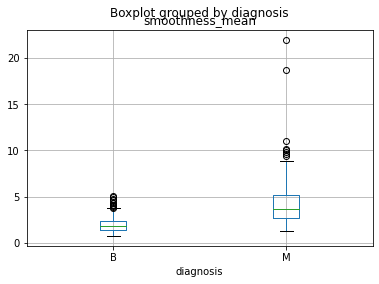

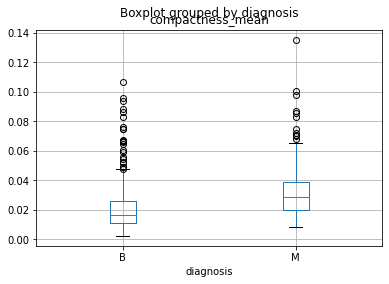

In [9]:
data.boxplot('smoothness_mean', 'diagnosis')
data.boxplot('compactness_mean', 'diagnosis')

As you can see, the boxplots confirm our assumptions:
- There are outliers for both groups 
- The benign `smoothness` values are more compact to each other

- The `smoothness` of malignant tumors is more distributed and its outliers are much far from the main quartiles. 
- Distributions of `compactness` values for both groups look similar, malignant data is higher than benign

Next step is the bootstraping function. Bootstrap is an approach that resamples a single dataset to create random samples with replacement (the same data point can appear more than once). Bootstrap allows us to estimate the entire population based on multiple samples.

<AxesSubplot:title={'center':'smoothness_mean'}, xlabel='diagnosis'>

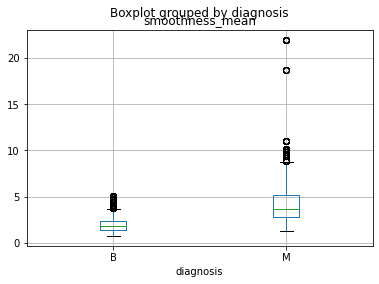

In [10]:
def bootstrap_samples(data, n_data):
    return data.sample(n_data, replace=True, random_state=2)
    
dataset = bootstrap_samples(data, len(data)*10)   
dataset.boxplot('smoothness_mean', 'diagnosis')

# Exploratory Analysis

Tasks:
- Identify 2-3 variables that are predictive of a malignant tumor.
- Display the relationship visually and write 1-2 sentences explaining the relationship.

To identify the predictive variables we'll select best features according to the 3 highest scores. For that we'll do the following: drop unnecessary columns, normalize the data, use sklearn for feature extraction (using chi-squared metric)

In [11]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
classes = data["diagnosis"].astype('category')
df = data.drop(['ID', 'diagnosis'], axis=1)

In [13]:
normalized_data = pd.DataFrame(preprocessing.normalize(df), columns=df.columns)
display(normalized_data.head(2))

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,0.000035,...,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,0.000024,...,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038


In [14]:
selector = SelectKBest(chi2, k=3)
features = selector.fit_transform(normalized_data, classes)
column_mask = selector.get_support()
selected_features = normalized_data.columns[column_mask]
print('Feature names', selected_features)
display(df[selected_features].head(2))

Feature names Index(['radius_worst', 'concave_points_mean', 'concave_points_sd_error'], dtype='object')


,radius_worst,concave_points_mean,concave_points_sd_error
0,122.8,17.33,184.6
1,132.9,23.41,158.8


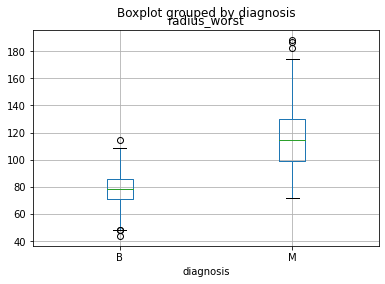

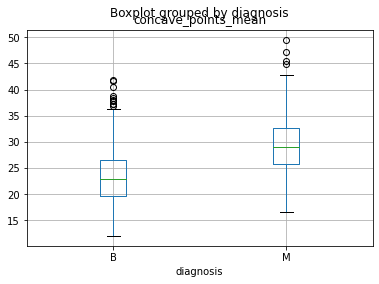

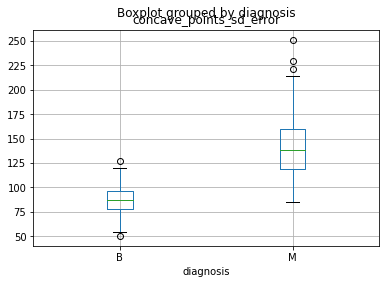

In [15]:
for feature in selected_features:
    data.boxplot(feature, 'diagnosis')

As the plots show, the values of selected features are quite distinguishable, which is good for the predicting task. Due to that, we can use linear algorithms for predicting the malignant tumors

# Modeling

Tasks:
- Build a model to predict the malignant tumors.
- Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
- Identify how you would control for overfitting in each classification technique.
- Evaluate the performance of each model.
- In each model, identify the most important predictive variables and explain how you identified them.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [17]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data[selected_features])
df = pd.DataFrame(scaled_data, columns=selected_features)
df['diagnosis'] = data.diagnosis
display(df.head(2))

,radius_worst,concave_points_mean,concave_points_sd_error,diagnosis
0,1.269934,-1.359293,2.303601,M
1,1.685955,-0.369203,1.535126,M


<AxesSubplot:title={'center':'radius_worst'}, xlabel='diagnosis'>

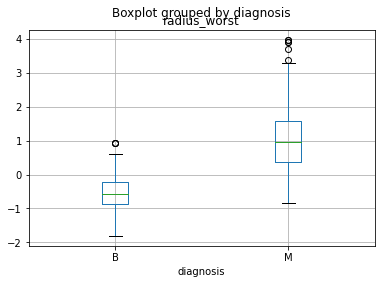

In [18]:
dataset = bootstrap_samples(df, 1000)   
dataset.boxplot(selected_features[0], 'diagnosis')

In [19]:
classes = dataset["diagnosis"].apply(lambda x: 1 if x == 'M' else 0)
x = dataset.drop('diagnosis', axis=1)
display(x.head(2))

,radius_worst,concave_points_mean,concave_points_sd_error
168,0.993959,1.083363,1.430876
527,-0.536668,-1.043377,-0.596944


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, classes, test_size=0.2, random_state=0)
print(f'{len(x_train)} train samples, {len(x_test)} test samples')
display(y_test.value_counts())


800 train samples, 200 test samples


0    117
1     83
Name: diagnosis, dtype: int64

The first algorithm is C-Support Vector Classification implemented in sklearn. It can be used for an unbalanced dataset and allows adjusting C parameter to prevent overfitting (As we increase the value, we prefer more accurate separating of points to the larger gap between them, which raises chances to overfit the data). For choosing an optimal value, we should test it on different data samples (cross-validation). We'll set linear kernel (it also can prevent overfitting)

In [21]:
clf = SVC(C=4, kernel='linear') #chose C=4, based on several runs
clf.fit(x_train, y_train)

preds = clf.predict(x_test)

print("SVC accuracy")
print("- train data:", clf.score(x_train, y_train)) 
print("- test data:", clf.score(x_test, y_test)) 
print("tn, fp, fn, tp - True benign, False malignant, False benign, True malignant")#negative=benign, positive=malignant
cm = confusion_matrix(y_true=y_test, y_pred=preds)
print(cm.ravel())

tn, fp, fn, tp = cm.ravel()
print(f'{fp+fn} samples are mispredicted')

SVC accuracy
- train data: 0.9525
- test data: 0.975
tn, fp, fn, tp - True benign, False malignant, False benign, True malignant
[115   2   3  80]
5 samples are mispredicted


In [22]:
print('False negative rate:', fn/(fp+tn))
print('False positive rate:', fp/(fn+tp))

print('f1-score =', tp/(tp + (fp+fn)/2))
print('precision =', tp/(tp + fp))
print('recall =', tp/(tp + fn))

False negative rate: 0.02564102564102564
False positive rate: 0.024096385542168676
f1-score = 0.9696969696969697
precision = 0.975609756097561
recall = 0.963855421686747


The next algorithm is K-Nearest Neighbors Classifier implemented in sklearn as well. It allows adjusting the n_neighbors parameter to prevent overfitting (As we increase the number of neighbors, we increase accuracy; to high value make the model overfit)

In [23]:
clf = KNeighborsClassifier(n_neighbors=4) #chose n_neighbors=4, based on several runs
clf.fit(x_train, y_train)

preds = clf.predict(x_test)

print("K-Neighbors Classifier accuracy")
print("- train data:", clf.score(x_train, y_train)) 
print("- test data:", clf.score(x_test, y_test)) 
print("tn, fp, fn, tp - True benign, False malignant, False benign, True malignant")#negative=benign, positive=malignant
cm = confusion_matrix(y_true=y_test, y_pred=preds)
print(cm.ravel())

tn, fp, fn, tp = cm.ravel()
print(f'{fp+fn} samples are mispredicted')

K-Neighbors Classifier accuracy
- train data: 0.9725
- test data: 0.96
tn, fp, fn, tp - True benign, False malignant, False benign, True malignant
[117   0   8  75]
8 samples are mispredicted


In [24]:
print('False negative rate:', fn/(fp+tn))
print('False positive rate:', fp/(fn+tp))

print('f1-score =', tp/(tp + (fp+fn)/2))
print('precision =', tp/(tp + fp))
print('recall =', tp/(tp + fn))

False negative rate: 0.06837606837606838
False positive rate: 0.0
f1-score = 0.9493670886075949
precision = 1.0
recall = 0.9036144578313253


- Even though it seems both classifiers show similar accuracy, the results actually differ from each other.
- KNN predicted all benign tumors, but gave 8 wrong diagnoses for malignant tumors.
- SVC mispredicted less data (5 < 8), it gave wrong diagnoses for 2 patients with benign tumors and for 3 patients with malignant.
- But it must be said, that accuracy depends on data sampling and splitting. To get different results, change random seeds in parameters of data sampling and splitting functions. Bootstrapping more data may increase accuracy as well.
- In this case, SVC gave better results, as potentially more patients who need treatment get it. But it may differ from sample to samle
- We should provide cross-validation to adjust the parameters and choose the most optimal for the problem algorithm. Optimality can be estimated using accuracy, f1-score, number of tp, tn, fn, fp and other statistical metrics

# Explanation

## To Technical Audiences

On the current data sampling:

    SVC: f1-score=0.970, false negative rate = 0.026, false positive rate: 0.024

    KNN: f1-score=0.950, false negative rate = 0.068, false positive rate: 0.0

The further steps:

    Provide more tests on:
        - balanced data (use class weights)
        - different hyperparameters
        
    Crossvalidation is necessary.
    

## To Non-Technical Audiences

- Here we compared two machine learning algorithms for prediction malignant tumors using different tumor shape parameters, such as radius and concavity.
- Both algorithms take our data points (we've selected 3 best features) and its labels (identifying each data point as a malignant or not malignant (benign) tumor) and learn what point is what. When the trained model gets a new datapoint, the model can predict what group it corresponds to: malignant or benign.
- The first algorithm (SVC) separates the groups by searching a line that best separates the different classes. It classifies the data depending on which side of the line it falls.
- The next one (K-neighbors) classifies the data by computing distance to the groups: which group is closer to the point that is the class it corresponds to. 
- Using these algorithms we are able to achieve 95% of true predictions and probably increase the accuracy by adjusting initial data and algorithms' parameters.

# DSI Instructor Task: Part 2

Student Samples: https://gist.github.com/jeff-boykin/3af5e25eabd6c10d8aa248c556f625a0

Code
- Feel free to comment on style, library usage, or other improvements.

Methodology
- Feel free to comment on the student's data setup, modeling methodology, and model evaluation.

Conceptual Understanding
- Finally, feel free to add any suggestions or takeaways on how the student could continue to improve their understanding of these concepts.


Student 1
- Imports are always put at the top of the file
- Importing unnecessary libraries
- Wrong import of LinearRegression (should be: from sklearn.linear_model import LinearRegression)
- Wrong import of cross_val_score() (should be: from sklearn.model_selection import cross_val_score)
- Variable names don't make sense
- Using different name for the loaded file (d->data)
- Wrong order of parameters in cross_val_score (x1<->x2)
- 'mean_absolute_error' is not a valid scoring value
- Using cv=1 in cross_val_score() doesn't make sense
- Should be more attentive and learn more about naming and other standarts in Python, using methods and its parameters, concepts of crossvalidation

Student 2
- Importing unnecessary libraries
- Wrong import of cross_val_score() (should be: from sklearn.model_selection import cross_val_score)
- Variable names should be lowercase
- 'mean_absolute_error' can't be set as scoring value
- Should be also more attentive and learn more about naming and other standarts in Python
